# Importando Bibliotecas

In [249]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pandas import DataFrame as df
from scipy.stats import zscore
import seaborn as sns
import re
import os

from ydata_profiling import ProfileReport
import sweetviz as sv

# Carregando e inspecionando dados

In [250]:
data = pd.read_csv("./data/card_transdata.csv", na_values=[' ', '_', '_______'], low_memory=False)

# Mostrando as primeiras 5 linhas do Dataframe Original

In [251]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# Mostrando o formato do Dataframe Original


In [252]:
# número de colunas
print(f'columns: {data.shape[1]}')

# número de linhas
print(f'rows: {data.shape[0]}')

columns: 8
rows: 1000000


# Obtendo informações sobre cada variável do dataframe original

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


# Remoção dos valores FRAUDES != True

In [254]:
# Remover todas as linhas onde 'fraud' é igual a 0
dataWithoutFrauds = data[data['fraud'] != 0]

# Redefinir o índice do DataFrame
dataWithoutFrauds.reset_index(drop=True, inplace=True)

# Removendo a coluna 'fraud''

In [255]:
dataWithoutFrauds = dataWithoutFrauds.drop('fraud', axis=1)

# Apresentando o Novo Dataframe SOMENTE com FRAUDES == True

In [256]:
dataWithoutFrauds

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0
1,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0
2,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0
3,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0
4,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
87398,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0
87399,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0
87400,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0
87401,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0


# Mostra as primeiras 5 linhas do Novo Dataframe SOMENTE com FRAUDES == True

In [257]:
dataWithoutFrauds.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0
1,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0
2,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0
3,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0
4,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0


# Obtendo informações sobre cada variável do Novo Dataframe SOMENTE com FRAUDES == True

In [258]:
dataWithoutFrauds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87403 entries, 0 to 87402
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              87403 non-null  float64
 1   distance_from_last_transaction  87403 non-null  float64
 2   ratio_to_median_purchase_price  87403 non-null  float64
 3   repeat_retailer                 87403 non-null  float64
 4   used_chip                       87403 non-null  float64
 5   used_pin_number                 87403 non-null  float64
 6   online_order                    87403 non-null  float64
dtypes: float64(7)
memory usage: 4.7 MB


# Mostrando o formato do Novo Dataframe SOMENTE com FRAUDES == True

In [259]:
# número de colunas
print(f'columns: {dataWithoutFrauds.shape[1]}')

# número de linhas
print(f'rows: {dataWithoutFrauds.shape[0]}')

columns: 7
rows: 87403


# Limpeza de dados

### 1. Valores ausentes

In [260]:
# Verifique a soma dos valores ausentes para cada coluna
dataWithoutFrauds.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
dtype: int64

### 2. Valores duplicados

In [261]:
# Verifique a soma das linhas duplicadas
print(f'duplicate rows: {dataWithoutFrauds.duplicated().sum()}')

duplicate rows: 0


# Algumas informações estatísticas

In [262]:
# Criando uma tabela de estatísticas descritivas para dados
dataWithoutFrauds.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,87403.0,66.261876,134.391608,0.025847,4.585729,15.454219,101.110104,10632.723672
distance_from_last_transaction,87403.0,12.712185,47.997697,0.000407,0.328199,1.157631,4.598504,2160.499922
ratio_to_median_purchase_price,87403.0,6.006323,5.564320,0.011966,3.500270,5.071294,7.331222,266.689692
repeat_retailer,87403.0,0.880119,0.324825,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,87403.0,0.256399,0.436647,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,87403.0,0.003123,0.055801,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,87403.0,0.946318,0.225391,0.000000,1.000000,1.000000,1.000000,1.000000


# Análise Exploratória dos Dados (EDA)

## Recursos Categóricos

### Distribuição de Compras em Lojas Repetidas

In [263]:
# Contagem de valores únicos na coluna 'repeat_retailer'
repeat_retailer_count = dataWithoutFrauds['repeat_retailer'].value_counts()
repeat_retailer_count

repeat_retailer
1.0    76925
0.0    10478
Name: count, dtype: int64

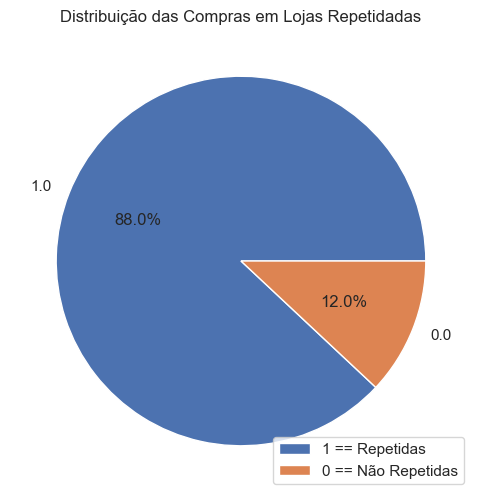

In [264]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotagem do gráfico de torta apenas para 'repeat_retailer' 
plt.figure(figsize=(6, 6))
plt.pie(repeat_retailer_count.values, labels=repeat_retailer_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras em Lojas Repetidadas')

# Adicionando legendas
legend_labels = ['1 == Repetidas', '0 == Não Repetidas']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras com Uso do Chip

In [265]:
# Contagem de valores únicos na coluna 'used_chip'
used_chip_count = dataWithoutFrauds['used_chip'].value_counts()
used_chip_count

used_chip
0.0    64993
1.0    22410
Name: count, dtype: int64

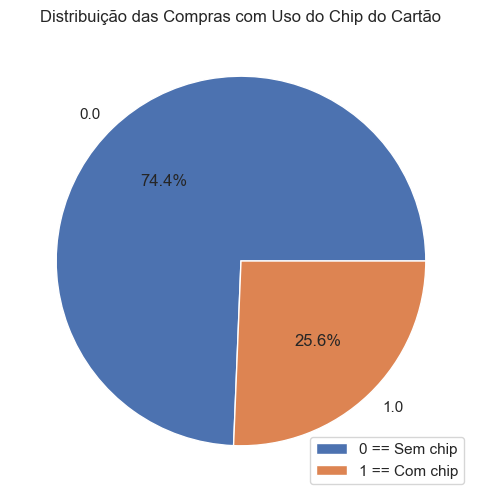

In [266]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotagem do gráfico de torta apenas para 'used_chip' 
plt.figure(figsize=(6, 6))
plt.pie(used_chip_count.values, labels=used_chip_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras com Uso do Chip do Cartão')

# Adicionando legendas
legend_labels = ['0 == Sem chip', '1 == Com chip']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras com Uso da Senha

In [267]:
# Contagem de valores únicos na coluna 'used_pin_number'
used_pin_number_count = dataWithoutFrauds['used_pin_number'].value_counts()
used_pin_number_count

used_pin_number
0.0    87130
1.0      273
Name: count, dtype: int64

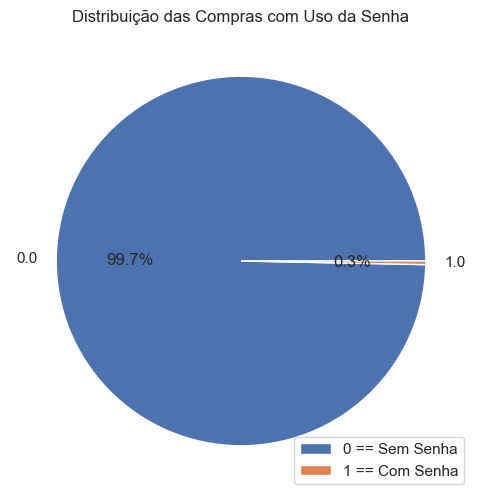

In [268]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotagem do gráfico de torta apenas para 'used_pin_number_count' 
plt.figure(figsize=(6, 6))
plt.pie(used_pin_number_count.values, labels=used_pin_number_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras com Uso da Senha')

# Adicionando legendas
legend_labels = ['0 == Sem Senha', '1 == Com Senha']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras Onlines

In [269]:
# Contagem de valores únicos na coluna 'online_order'
online_order_count = dataWithoutFrauds['online_order'].value_counts()
online_order_count

online_order
1.0    82711
0.0     4692
Name: count, dtype: int64

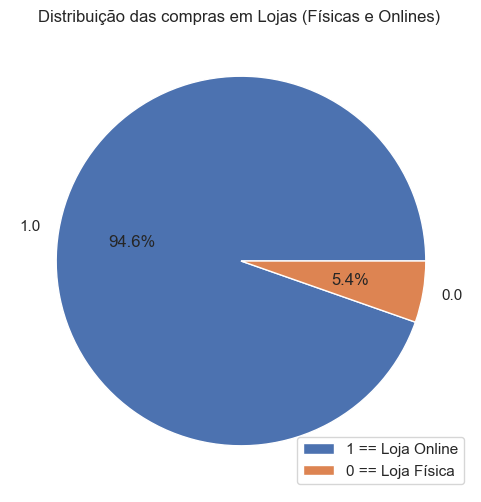

In [270]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotagem do gráfico de torta apenas para 'online_order_count' 
plt.figure(figsize=(6, 6))
plt.pie(online_order_count.values, labels=online_order_count.index, autopct='%1.1f%%')
plt.title('Distribuição das compras em Lojas (Físicas e Onlines) ')

# Adicionando legendas
legend_labels = ['1 == Loja Online', '0 == Loja Física']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de todas colunas categóricas

In [271]:
# Crie uma lista contendo recursos categóricos
cat_features = ['repeat_retailer', 'used_chip','used_pin_number', 'online_order']

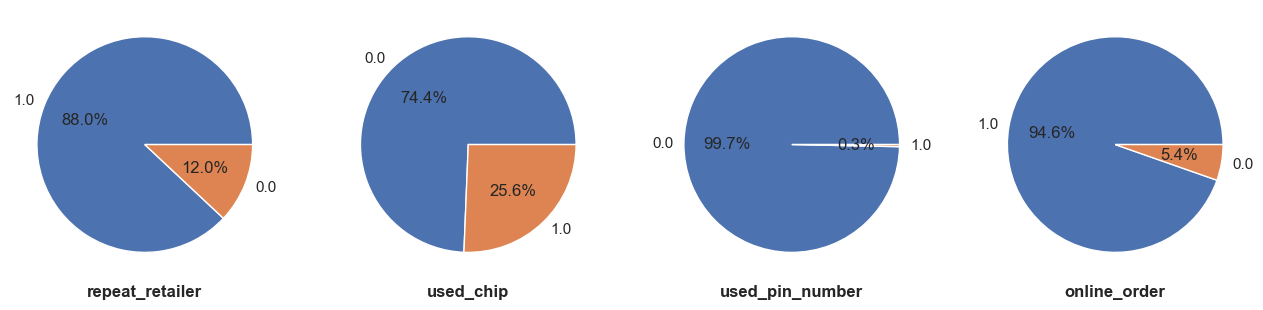

In [272]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Desenhando um gráfico de pizza para exibir a distribuição de cada coluna categórica
plt.figure(figsize = (16, 12))
for i, col in enumerate(cat_features):
    plt.subplot(1, 4, i+1)
    plt.pie(x = dataWithoutFrauds[col].value_counts().values, 
            labels = dataWithoutFrauds[col].value_counts().index, 
            autopct = '%1.1f%%')
    plt.xlabel(col, weight = 'bold')
plt.show()

## Recursos Numéricos

### Distribuição das Distâncias de Casa

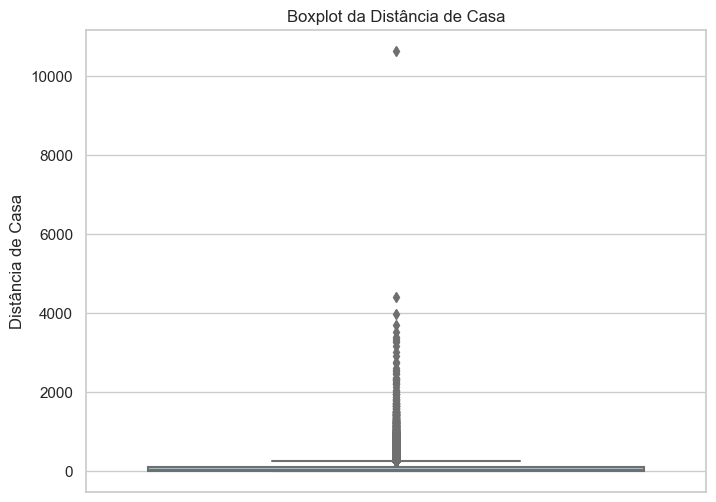

In [273]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotagem do boxplot para 'distance_from_home'
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataWithoutFrauds, y='distance_from_home', color='skyblue')
plt.title('Boxplot da Distância de Casa')
plt.ylabel('Distância de Casa')

plt.show()

### Distribuição das Distâncias da Última da Transação

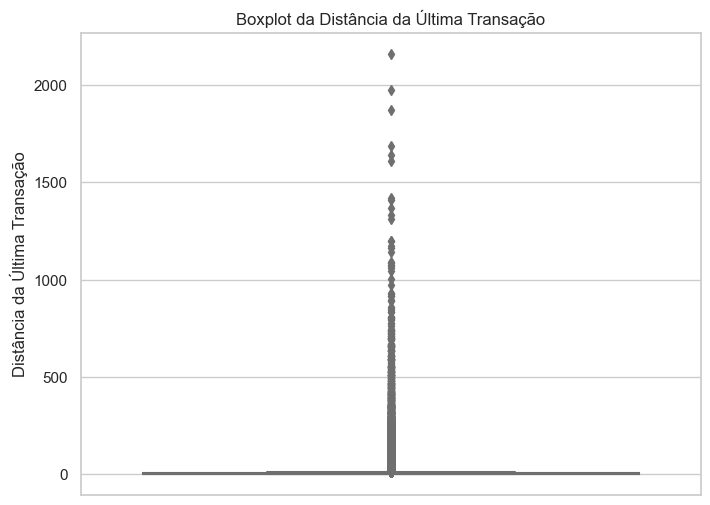

In [274]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotagem do boxplot para 'distance_from_last_transaction'
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataWithoutFrauds, y='distance_from_last_transaction', color='skyblue')
plt.title('Boxplot da Distância da Última Transação')
plt.ylabel('Distância da Última Transação')

plt.show()

### Distribuição da Proporção entre a transação do preço de compra e o preço de compra médio

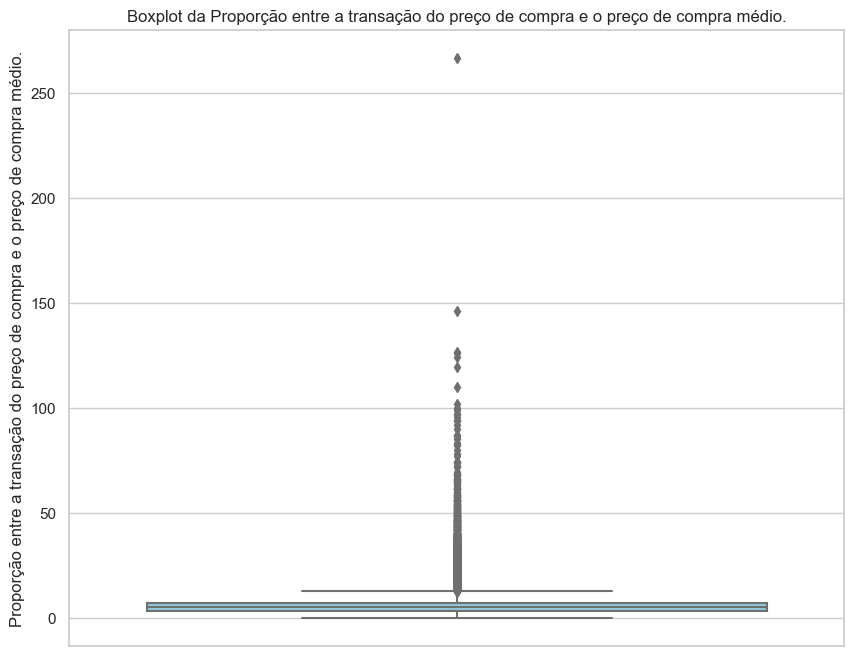

In [275]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotagem do boxplot para 'ratio_to_median_purchase_price'
plt.figure(figsize=(10, 8))
sns.boxplot(data=dataWithoutFrauds, y='ratio_to_median_purchase_price', color='skyblue')
plt.title('Boxplot da Proporção entre a transação do preço de compra e o preço de compra médio.')
plt.ylabel('Proporção entre a transação do preço de compra e o preço de compra médio.')

plt.show()

In [276]:
# Crie uma lista contendo recursos numéricos
num_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

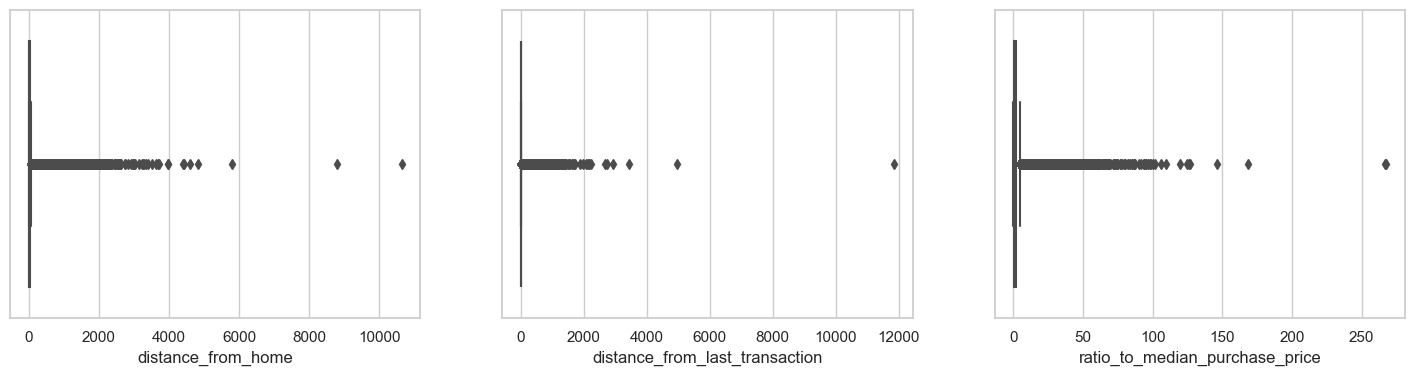

In [277]:
# Drawing a boxplot to display the distribution of each numerical column to detect the outliers
plt.figure(figsize = (18, 4))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data = data, x = col)
plt.show()

In [278]:
analise = sv.analyze(dataWithoutFrauds)
analise.show_html('sweetviz.html')

prof = ProfileReport(dataWithoutFrauds)
prof.to_file(output_file='pandasprof.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 361.39it/s]


## Preparação dos dados para aplicação do KMEANS

In [279]:
groupedMeanFrame = dataWithoutFrauds.div(dataWithoutFrauds.sum(axis=1), axis='rows')
groupedMeanFrame

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,0.031885,0.843103,0.095100,0.014956,0.000000,0.0,0.014956
1,0.050764,0.897540,0.025000,0.013348,0.000000,0.0,0.013348
2,0.080678,0.904644,0.004398,0.005140,0.000000,0.0,0.005140
3,0.744735,0.043271,0.128352,0.027881,0.027881,0.0,0.027881
4,0.557860,0.081906,0.255614,0.052310,0.000000,0.0,0.052310
...,...,...,...,...,...,...,...
87398,0.794173,0.015477,0.155285,0.017533,0.000000,0.0,0.017533
87399,0.984736,0.001663,0.001817,0.005892,0.000000,0.0,0.005892
87400,0.980805,0.000035,0.003422,0.007869,0.000000,0.0,0.007869
87401,0.592612,0.039528,0.344807,0.011527,0.000000,0.0,0.011527


In [280]:
distortions = []
n_clusters = range(2, 15)
for n_clus in n_clusters:
    print(n_clus)
    distortions.append(KMeans(n_clusters=n_clus, max_iter=10_000, n_init=100, random_state=61658).fit(groupedMeanFrame).inertia_ )

2
3
4
5
6
7
8
9
10
11
12
13
14


In [215]:
distortions

[8860.81184185348,
 4267.668693987383,
 2704.4661158697,
 2133.6359788901145,
 1643.9937658475878,
 1412.7163929584021,
 1213.235465072039,
 1078.366930145823,
 966.9224424827764,
 894.3196693318896,
 817.6287749867622,
 752.312260835127,
 706.0290212574466]

## Método do Cotovelo

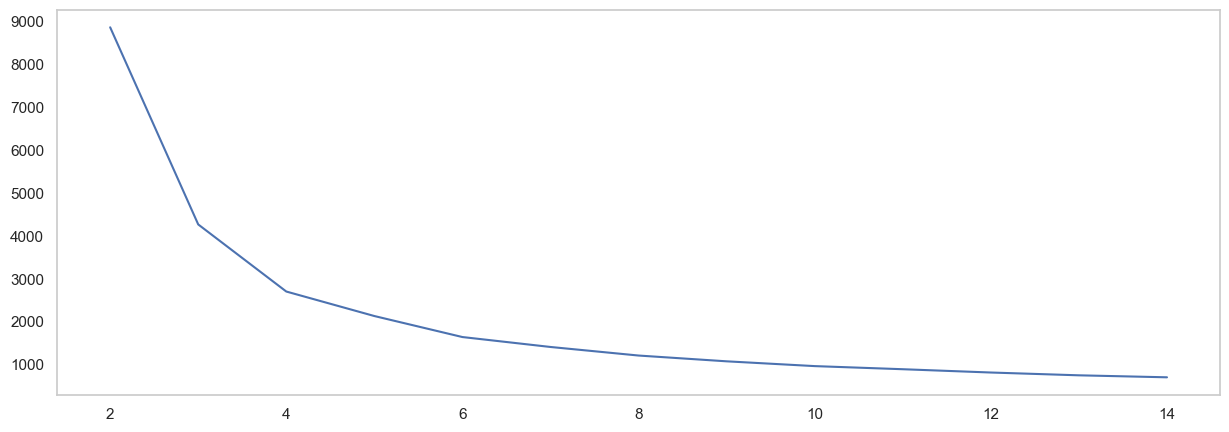

In [216]:
plt.figure(figsize=(15,5))
plt.plot(n_clusters, distortions)
plt.grid()

In [236]:
km = KMeans(n_clusters=4, max_iter=10_000, n_init=100, random_state=61658)
clusterClassArray = km.fit_predict(groupedMeanFrame)
clusterClassArray

array([2, 2, 2, ..., 1, 3, 3], dtype=int32)

In [237]:
dataWithoutFrauds.loc[:, 'clus'] = x_t
dataWithoutFrauds

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,clus
0,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,2
1,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,2
2,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,2
3,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1
4,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,3
...,...,...,...,...,...,...,...,...
87398,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1
87399,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1
87400,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1
87401,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,3


In [238]:
for col in dataWithoutFrauds.drop( 'clus', axis=1) .columns: 
    for cl in np.sort(dataWithoutFrauds.clus.unique()):
        if dataWithoutFrauds.dtypes[col] == object:
            vc = 100*dataWithoutFrauds.loc[dataWithoutFrauds.clus==cl, col].value_counts() / (dataWithoutFrauds.clus==cl) . sum()
            for cat, cnt in vc.reset_index().values:
                print(f'{cl:d}; {col}_{str(cat):5}; {cnt:5.2f}%'.replace('.', ','))
        else:
            print(f'{cl:d}; {col}; {dataWithoutFrauds.loc[dataWithoutFrauds.clus==cl, col].mean(): .2f}'.replace('.', ','))

for col in dataWithoutFrauds.drop( 'clus', axis=1).columns:
    if dataWithoutFrauds.dtypes[col] == object:
        vc = 100*dataWithoutFrauds.loc[:, col].value_counts() / (dataWithoutFrauds.shape[0])
        for cat, cnt in vc.reset_index().values:
            print(f'All; {col}_{str(cat):s}; {cnt:5.2f}%'.replace('.', ','))
    else:
        print(f'All; {col}; {dataWithoutFrauds.loc[:, col].mean():.2f}'.replace('.', ','))

0; distance_from_home;  3,20
1; distance_from_home;  160,15
2; distance_from_home;  13,03
3; distance_from_home;  16,31
0; distance_from_last_transaction;  1,66
1; distance_from_last_transaction;  3,44
2; distance_from_last_transaction;  84,51
3; distance_from_last_transaction;  3,90
0; ratio_to_median_purchase_price;  9,54
1; ratio_to_median_purchase_price;  3,69
2; ratio_to_median_purchase_price;  3,93
3; ratio_to_median_purchase_price;  7,01
0; repeat_retailer;  0,60
1; repeat_retailer;  1,00
2; repeat_retailer;  0,78
3; repeat_retailer;  1,00
0; used_chip;  0,32
1; used_chip;  0,16
2; used_chip;  0,21
3; used_chip;  0,35
0; used_pin_number;  0,00
1; used_pin_number;  0,01
2; used_pin_number;  0,01
3; used_pin_number;  0,00
0; online_order;  0,90
1; online_order;  0,95
2; online_order;  0,92
3; online_order;  1,00
All; distance_from_home; 66,26
All; distance_from_last_transaction; 12,71
All; ratio_to_median_purchase_price; 6,01
All; repeat_retailer; 0,88
All; used_chip; 0,26
All; us

In [239]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dataWithoutFrauds)

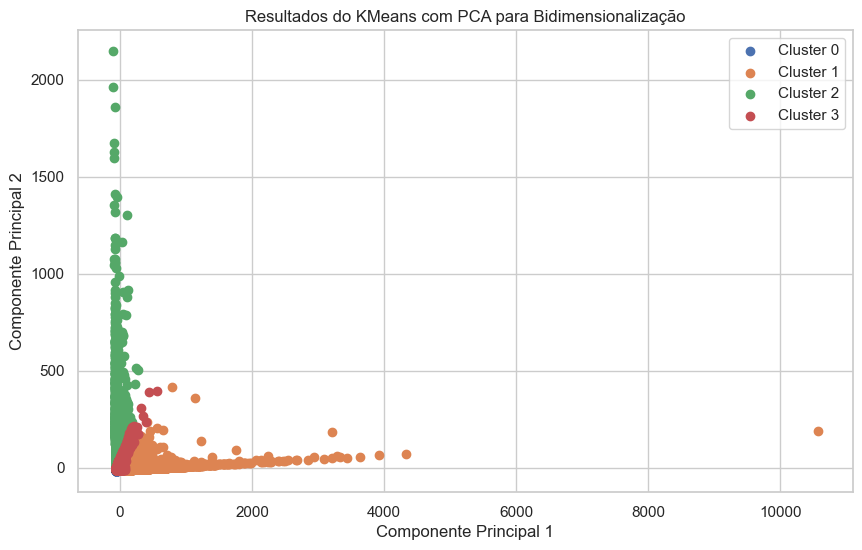

In [241]:
# Agora, você tem os resultados do KMeans (clusters) e os principais componentes após a redução de dimensionalidade com PCA
# Vamos plotar os resultados em um gráfico de dispersão

plt.figure(figsize=(10, 6))

# Plot os pontos dos dados após a redução de dimensionalidade, coloridos pelos clusters atribuídos pelo KMeans
for i in range(4):
    plt.scatter(principal_components[x_t == i, 0], principal_components[x_t == i, 1], label=f'Cluster {i}')

plt.title('Resultados do KMeans com PCA para Bidimensionalização')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

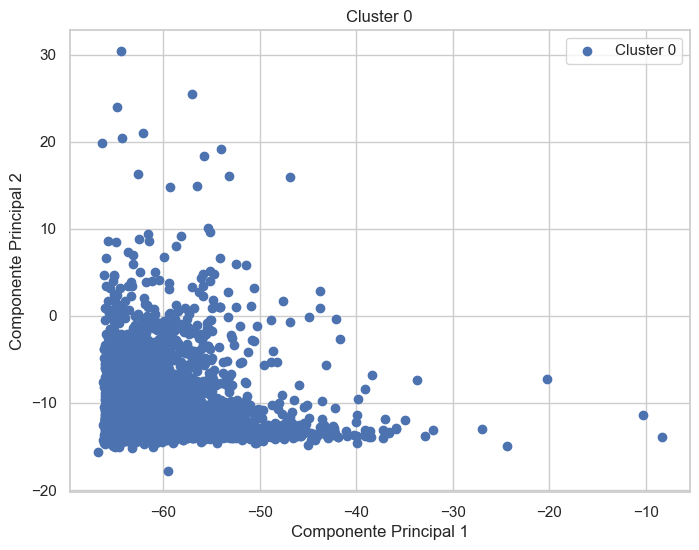

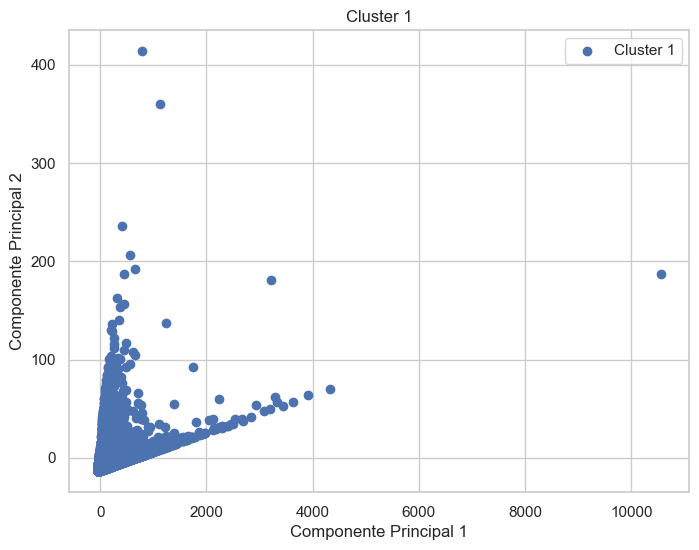

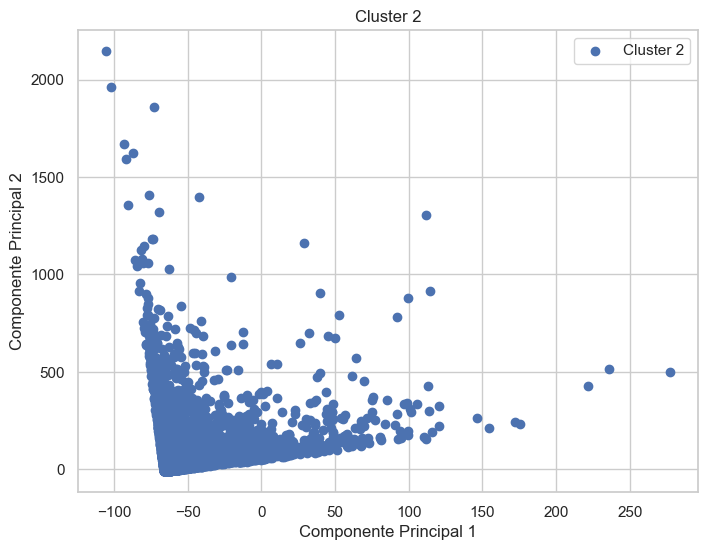

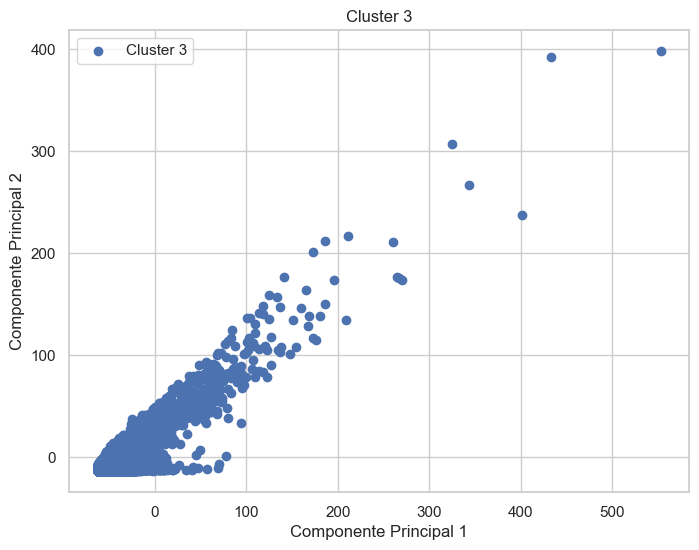

In [242]:
plt.figure(figsize=(12, 8))

for i in range(4):
    plt.figure(figsize=(8, 6))
    cluster_points = principal_components[x_t == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
    plt.title(f'Cluster {i}')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend()
    plt.grid(True)
    plt.show()

pca - reduzir dimensionalidade  \/ mapa de calor com classes